# VLC video stream

In [1]:
import skimage
from skimage import filters
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gaussian_function(x, a, I, mu, sig):
    return a + I / np.sqrt(2 * np.pi * sig ** 2) * np.exp(-(x - mu) ** 2 / 2. / sig ** 2)

def do_gaussian_fit(x,y):
    mu = np.average(x, weights=np.abs(y - np.min(y)))
    sigma = np.sqrt(np.average(x**2, weights=np.abs(y - np.min(y))) - mu**2)
    p0 = [y.min(), (np.max(y) - np.min(y)) * np.sqrt(2 * np.pi * sigma**2), mu, sigma]
    popt, pcov = curve_fit(gaussian_function, x, y, p0=p0, maxfev=1000) # maxfev is the number of tries it does the fit
    return popt, pcov

In [2]:
infile = open("../../saved_video_ring.pickle",'rb')
video = pickle.load(infile)
infile.close()

In [3]:
infile

<_io.BufferedReader name='../../saved_video_ring.pickle'>

In [5]:
video[0].shape

(576, 720, 3)

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


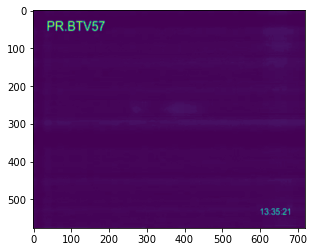

In [6]:
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(video[14][...,:3], rgb_weights)
grayscale_image = grayscale_image/grayscale_image.max()
med_filt_frame = filters.median(grayscale_image, np.ones((3, 3)))
fig, ax = plt.subplots()
# ax.imshow(med_filt_frame[100:500,100:550])
ax.imshow(med_filt_frame)

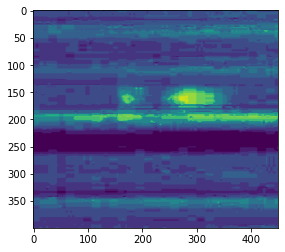

In [7]:
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(video[14][...,:3], rgb_weights)
grayscale_image = grayscale_image/grayscale_image.max()
med_filt_frame = filters.median(grayscale_image, np.ones((3, 3)))
fig, ax = plt.subplots()
ax.imshow(med_filt_frame[100:500,100:550])

/tmp/ipykernel_600/1993335597.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


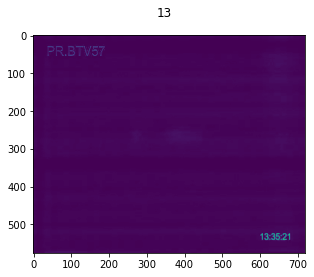

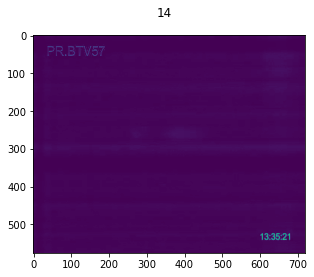

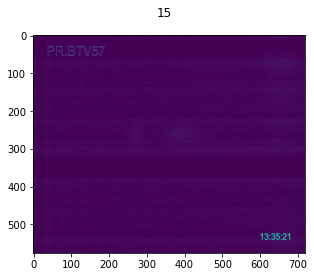

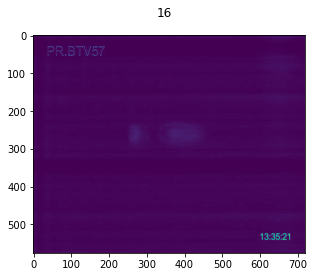

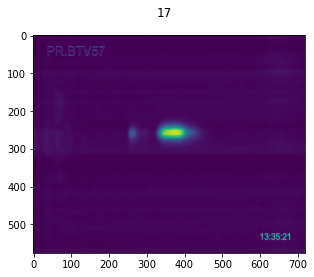

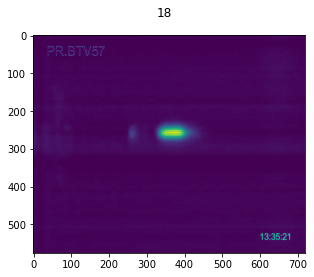

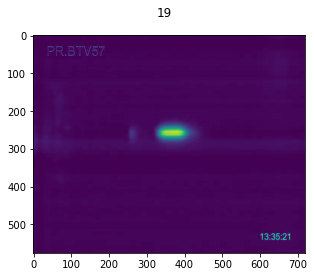

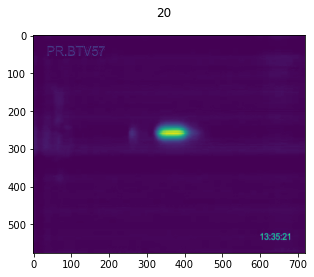

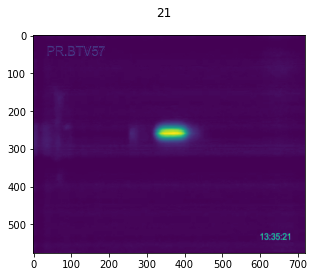

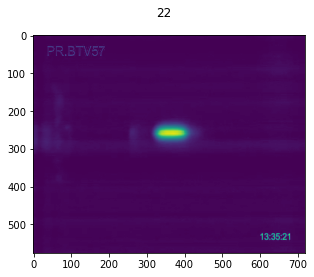

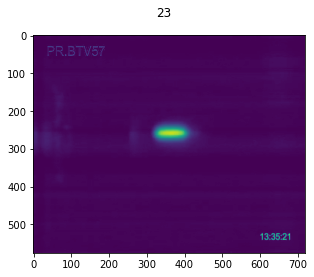

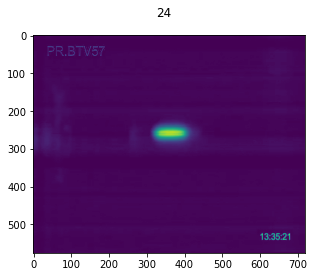

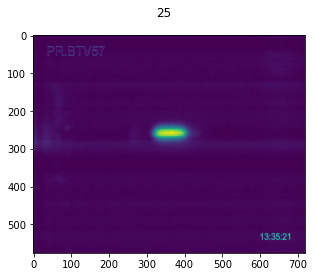

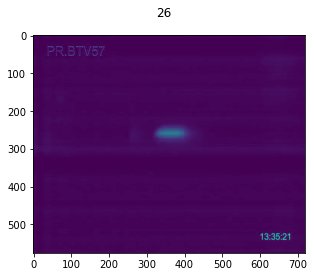

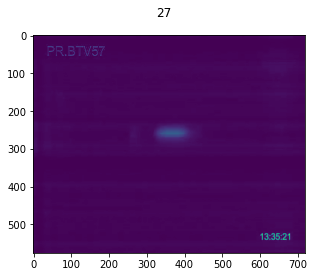

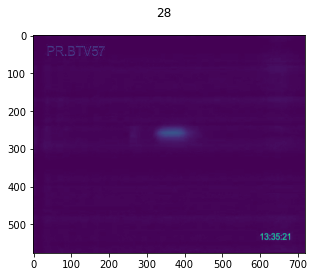

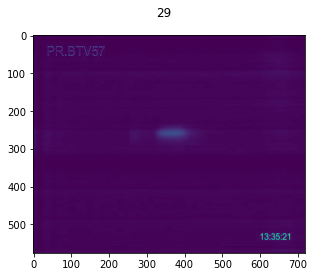

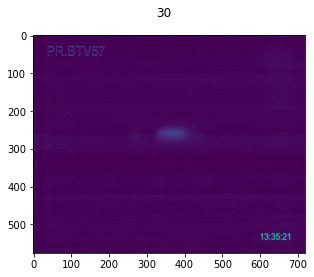

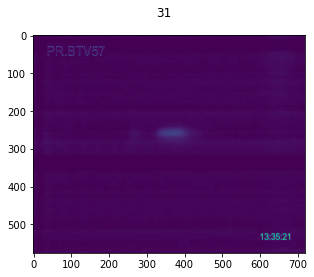

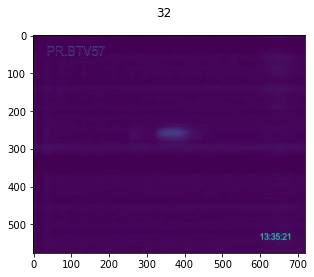

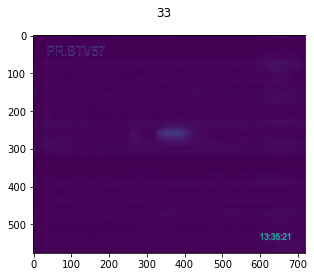

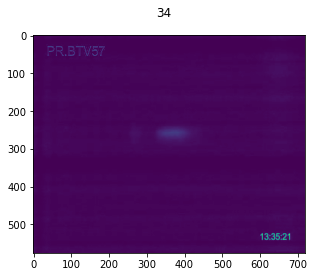

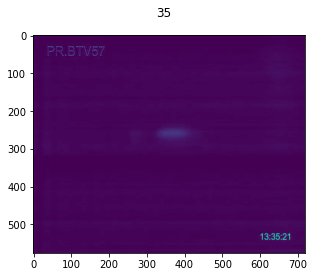

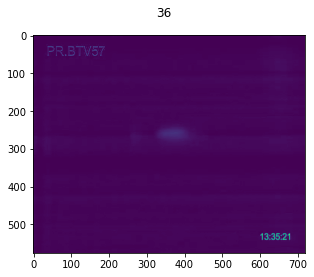

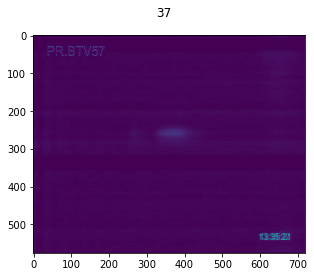

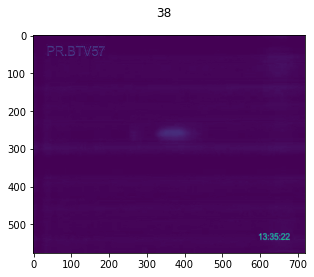

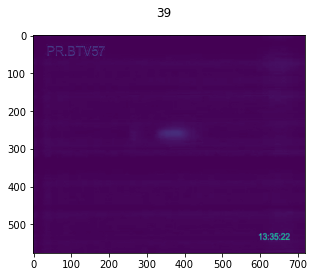

In [8]:
for i in list(range(13, 40)):
    fig, ax = plt.subplots()
#     med_filt_frame = filters.median(video[i], np.ones((3, 3)))
    ax.imshow(video[i][:,:,2])
    fig.suptitle(f"{i}")

<IPython.core.display.Javascript object>


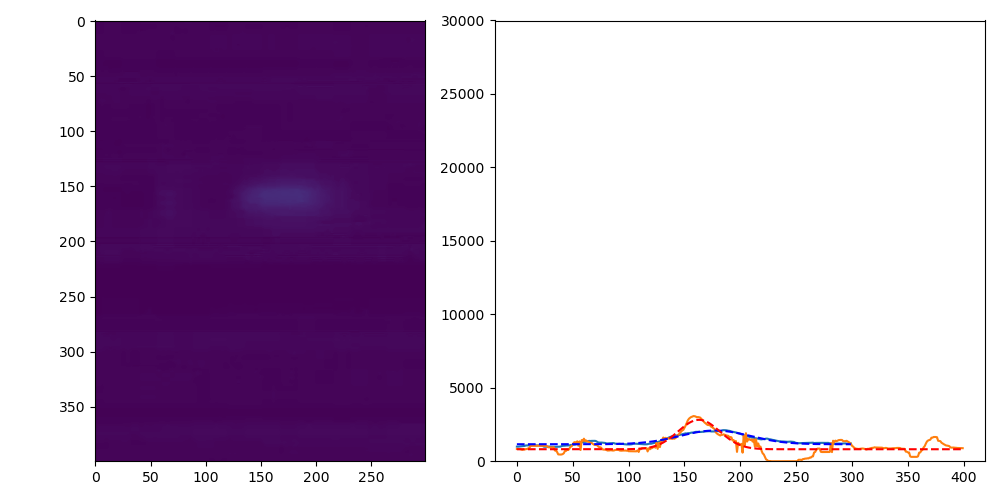

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss

In [22]:
plt.style.use('default')
from matplotlib.animation import FuncAnimation, PillowWriter
%matplotlib notebook
fig, ax  = plt.subplots(1,2, figsize=(10,5), tight_layout=True)

rgb_weights = [0.2989, 0.5870, 0.1140]

def animate(i):
    ax[0].clear()
    ax[1].clear()

    i = i+10

    grayscale_image = np.dot(video[i][...,:3], rgb_weights)
    grayscale_image = grayscale_image/255
    med_filt_frame = filters.median(grayscale_image, np.ones((3, 3)))

    ax[0].imshow(med_filt_frame[100:500,200:500], cmap="viridis", vmin=0, vmax=255)
    ax[1].plot(med_filt_frame[100:500,200:500].sum(axis=0))
    ax[1].plot(med_filt_frame[100:500,200:500].sum(axis=1))
    ax[1].set_ylim(0,30000)
    
    try:
        Hy = med_filt_frame[100:500,200:500].sum(axis=0)
        Hx = np.linspace(0, len(Hy)-1, len(Hy))
        popt, pcov = do_gaussian_fit(Hx, Hy)

        ax[1].plot(Hx, gaussian_function(Hx, popt[0], popt[1], popt[2], popt[3]), color="b", linestyle="--")
    except:
        pass
    
    try:
        Hy = med_filt_frame[100:500,200:500].sum(axis=1)
        Hx = np.linspace(0, len(Hy)-1, len(Hy))
        popt, pcov = do_gaussian_fit(Hx, Hy)
        


        ax[1].plot(Hx, gaussian_function(Hx, popt[0], popt[1], popt[2], popt[3]), color="r", linestyle="--")
    except:
        pass
    
    return
    
ani = FuncAnimation(fig, animate, interval=200, blit=True, repeat=False, frames=30)
ani.save("gif/vlc_ring_median_fit.gif", dpi=300, writer=PillowWriter(fps=5))

<IPython.core.display.Javascript object>


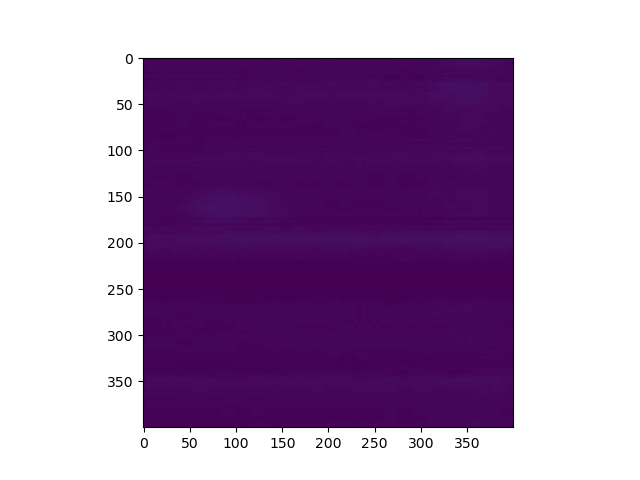

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


In [10]:
fig, ax = plt.subplots()
grayscale_image = np.dot(video[14][...,:3], rgb_weights)
grayscale_image = grayscale_image/255
med_filt_frame = filters.median(grayscale_image, np.ones((3, 3)))

ax.imshow(med_filt_frame[100:500,300:700], cmap="viridis", vmin=0, vmax=255)

<IPython.core.display.Javascript object>


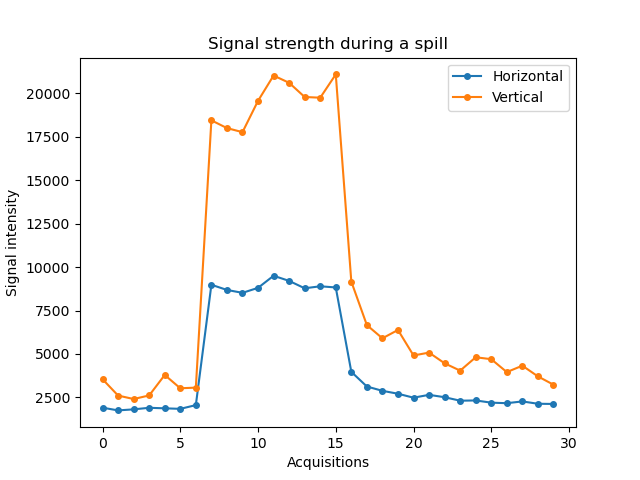

In [11]:
listH = []
listV = []
for i in list(range(10, 40)):
    grayscale_image = np.dot(video[i][...,:3], rgb_weights)
    grayscale_image = grayscale_image/255
    med_filt_frame = filters.median(grayscale_image, np.ones((3, 3)))
    listH.append(med_filt_frame[100:500,300:700].sum(axis=0).max())
    listV.append(med_filt_frame[100:500,300:700].sum(axis=1).max())

fig, ax = plt.subplots()
ax.plot(listH, marker="o", markersize=4, label ="Horizontal")
ax.plot(listV, marker="o", markersize=4, label="Vertical")
ax.set_xlabel("Acquisitions")
ax.set_ylabel("Signal intensity")
ax.set_title("Signal strength during a spill")
ax.legend()

<IPython.core.display.Javascript object>


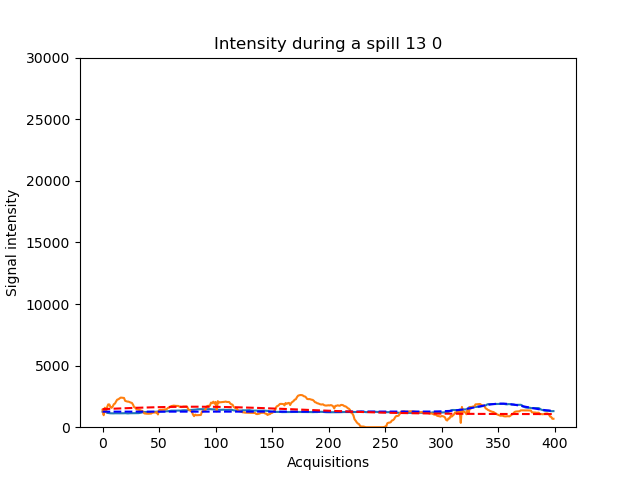

<IPython.core.display.Javascript object>


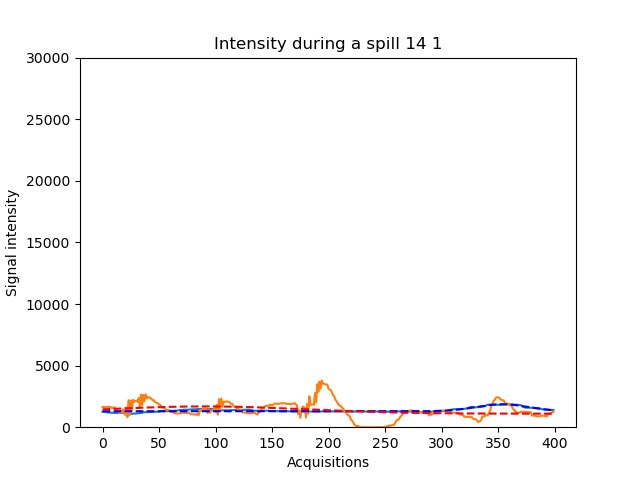

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


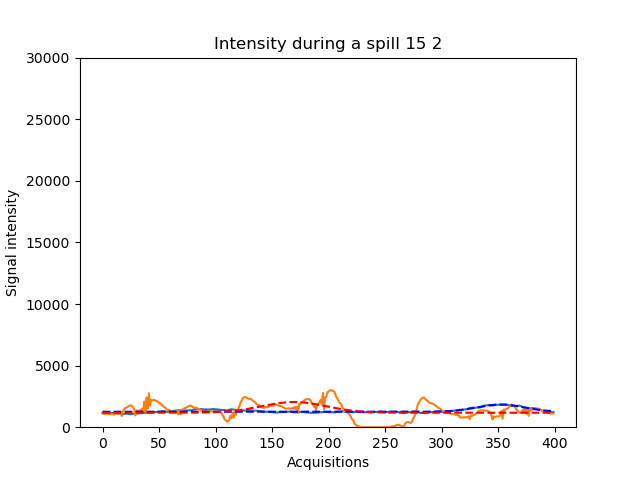

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


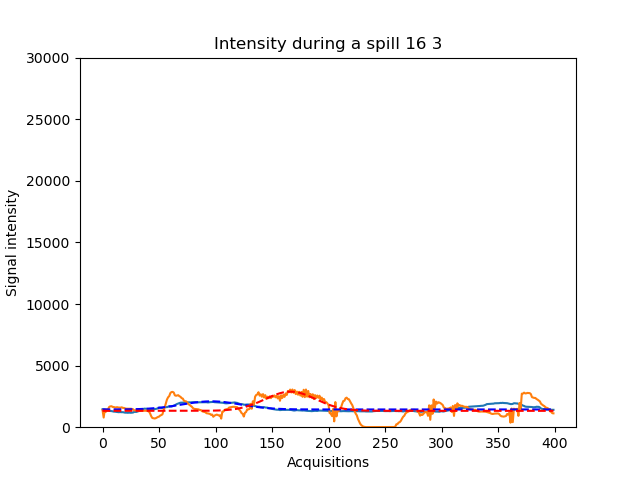

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


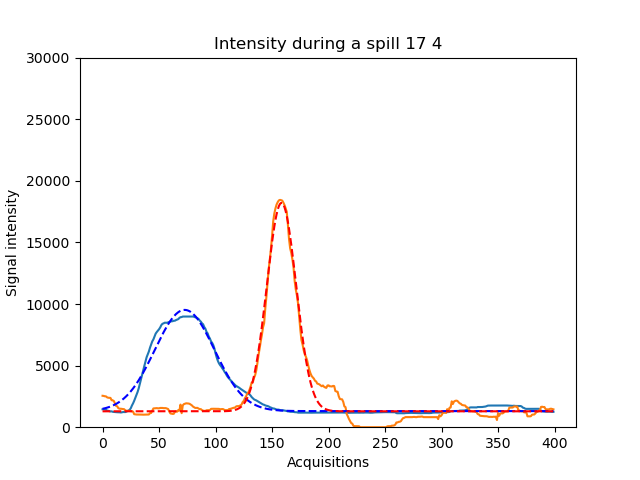

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


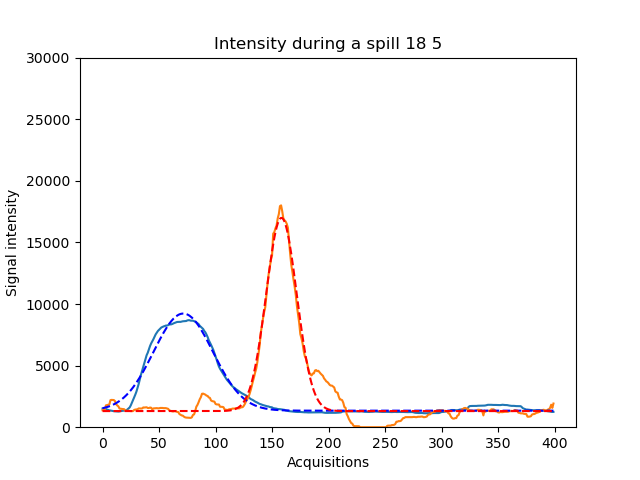

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


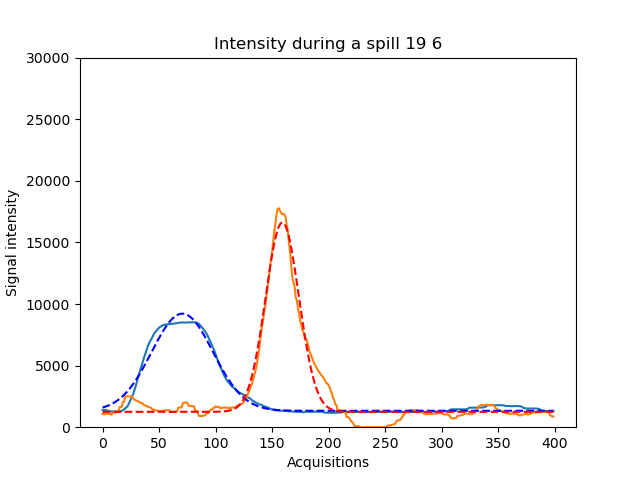

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


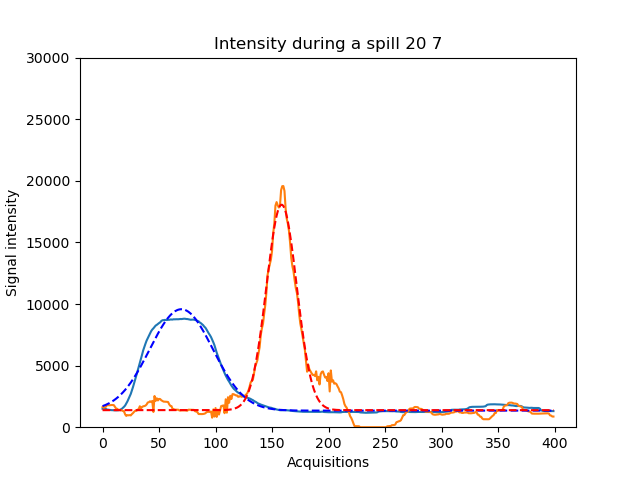

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


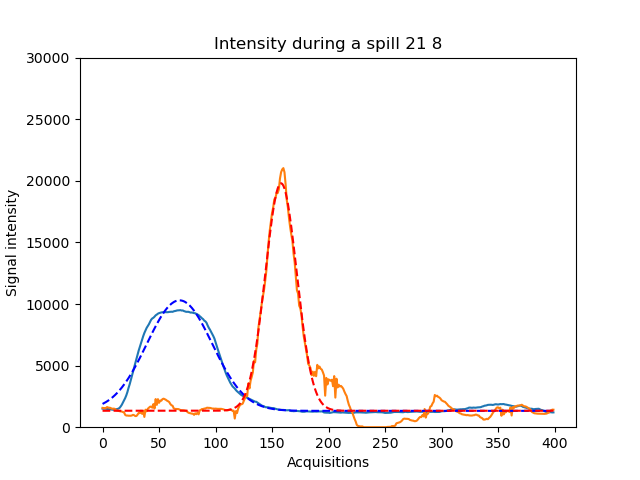

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


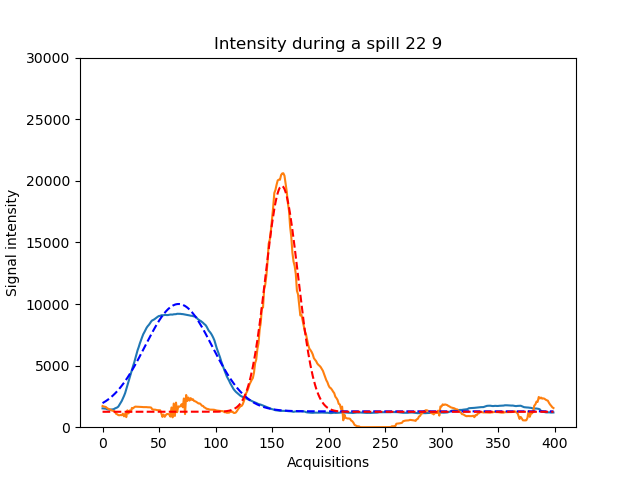

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


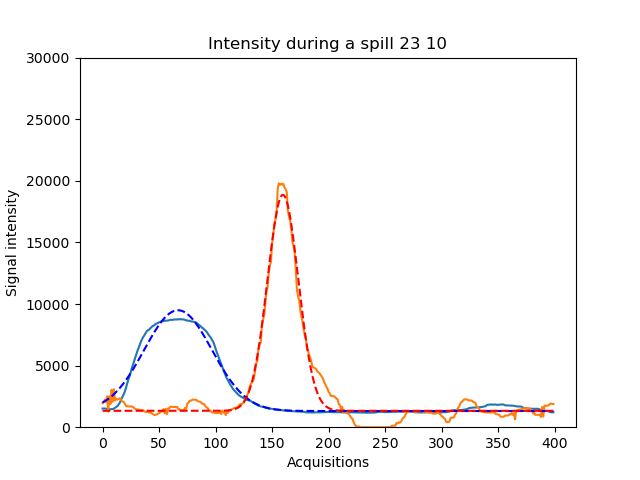

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


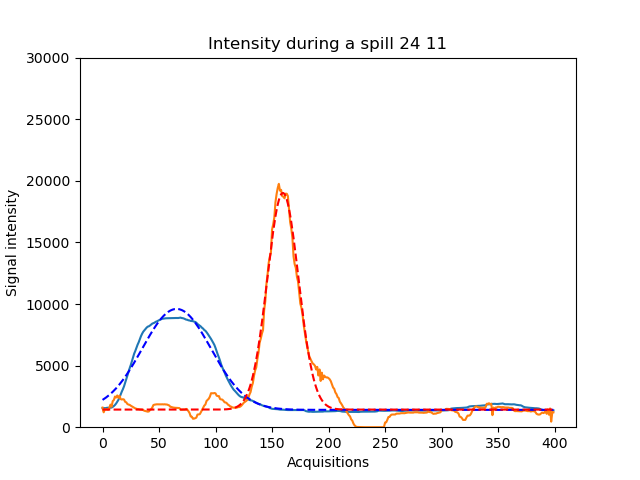

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


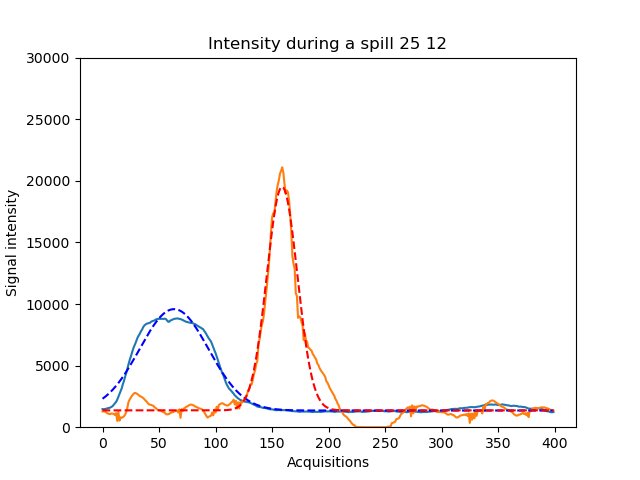

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


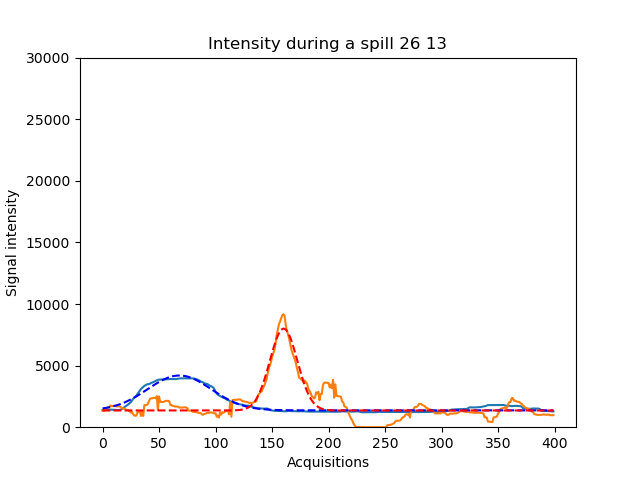

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


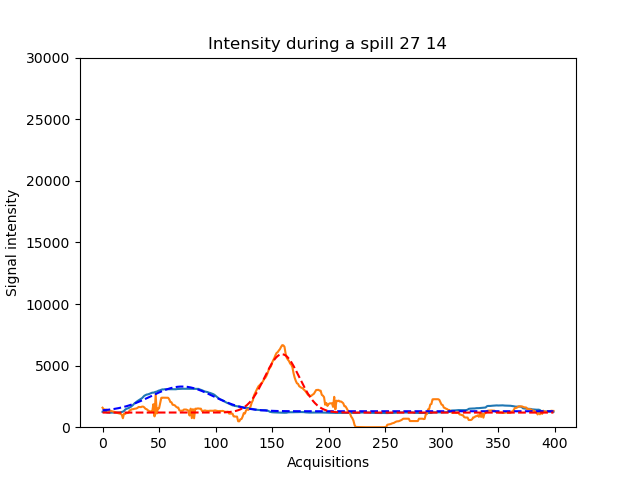

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


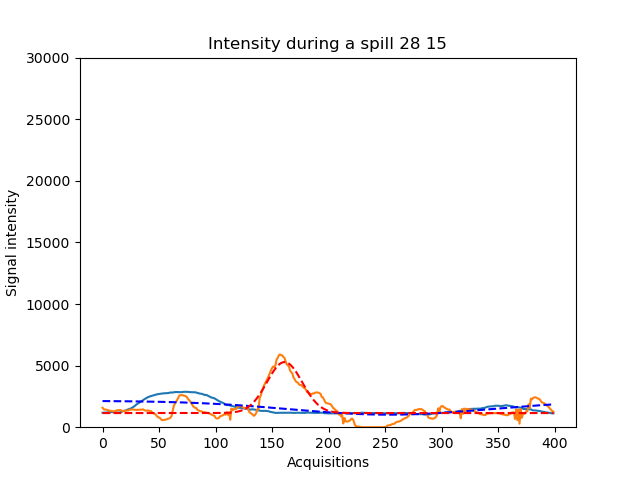

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


<IPython.core.display.Javascript object>


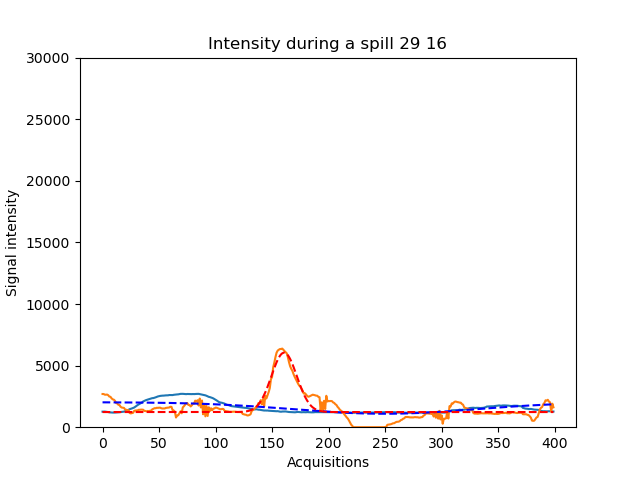

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/skimage/util/dtype.py:140: UserWarning: Possible precision loss when converting from float64 to uint8
  warn("Possible precision loss when converting from {} to {}"


In [12]:
muH = []
muV = []
sigH = []
sigV = []

for i in list(range(13, 30)):
    fig, ax = plt.subplots()

    grayscale_image = np.dot(video[i][...,:3], rgb_weights)
    grayscale_image = grayscale_image/255
    med_filt_frame = filters.median(grayscale_image, np.ones((3, 3)))
    ax.plot(med_filt_frame[100:500,300:700].sum(axis=0))
    ax.plot(med_filt_frame[100:500,300:700].sum(axis=1))
    ax.set_ylim(0,30000)
    try:
        Hy = med_filt_frame[100:500,300:700].sum(axis=0)
        Hx = np.linspace(0, len(Hy)-1, len(Hy))
        popt, pcov = do_gaussian_fit(Hx, Hy)

        muH.append(popt[2])
        sigH.append(abs(popt[3]))
        
        ax.plot(Hx, gaussian_function(Hx, popt[0], popt[1], popt[2], popt[3]), color="b", linestyle="--")
    except:
        muH.append(np.nan)
        sigH.append(np.nan)
        pass
    
    try:
        Hy = med_filt_frame[100:500,300:700].sum(axis=1)
        Hx = np.linspace(0, len(Hy)-1, len(Hy))
        popt, pcov = do_gaussian_fit(Hx, Hy)
        
        muV.append(popt[2])
        sigV.append(abs(popt[3]))

        ax.plot(Hx, gaussian_function(Hx, popt[0], popt[1], popt[2], popt[3]), color="r", linestyle="--")
    except:
        muV.append(np.nan)
        sigV.append(np.nan)
        pass

    ax.set_xlabel("Acquisitions")
    ax.set_ylabel("Signal intensity")
    ax.set_title(f"Intensity during a spill {i} {i-13}")

<IPython.core.display.Javascript object>


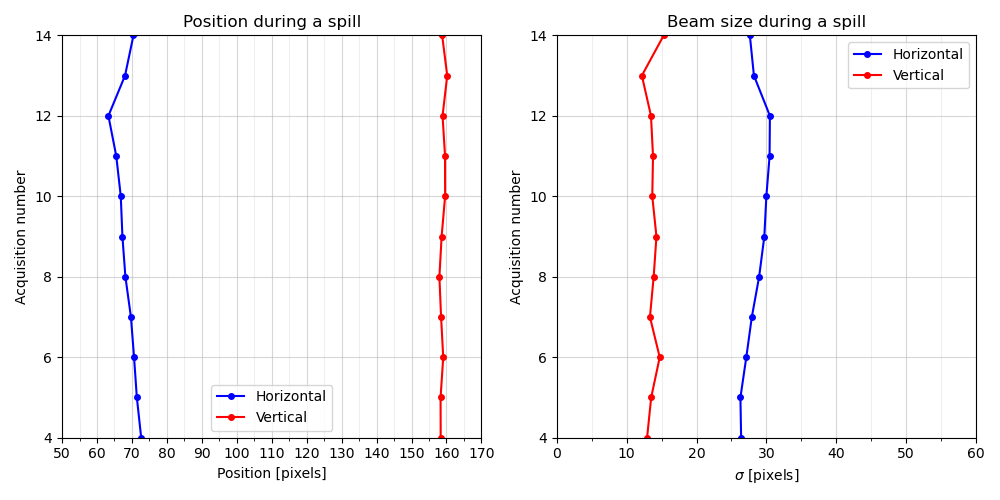

In [44]:
fig, ax = plt.subplots(1,2, figsize=(10,5), tight_layout=True)
ax[0].plot(muH, np.linspace(0,len(muH)-1,len(muH)), marker="o", markersize="4", color="b", label="Horizontal")
ax[0].plot(muV, np.linspace(0,len(muV)-1,len(muV)), marker="o", markersize="4", color="r", label="Vertical")

ax[0].legend()
ax[0].set_xlabel("Position [pixels]")
ax[0].set_ylabel("Acquisition number")
ax[0].set_title("Position during a spill")

ax[1].plot(sigH, np.linspace(0,len(sigH)-1,len(sigH)), marker="o", markersize="4", color="b", label="Horizontal")
ax[1].plot(sigV, np.linspace(0,len(sigV)-1,len(sigV)), marker="o", markersize="4", color="r", label="Vertical")

ax[1].legend()
ax[1].set_xlabel("$\sigma$ [pixels]")
ax[1].set_ylabel("Acquisition number")
ax[1].set_title("Beam size during a spill")

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 1001, 10)
minor_ticks = np.arange(0, 1001, 5)

ax[0].set_xticks(major_ticks)
ax[0].set_xticks(minor_ticks, minor=True)
ax[1].set_xticks(major_ticks)
ax[1].set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
ax[0].grid(which='minor', alpha=0.2)
ax[0].grid(which='major', alpha=0.5)
ax[1].grid(which='minor', alpha=0.2)
ax[1].grid(which='major', alpha=0.5)

ax[0].set_xlim(50,170)
ax[0].set_ylim(4,14)

ax[1].set_xlim(0,60)
ax[1].set_ylim(4,14)

fig.savefig("fig/vlc_btv57.png", facecolor='white', transparent=False,
                    bbox_inches='tight');